In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
df = pd.read_csv('sales_data.csv')

In [71]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Product_ID,1000.0,1050.12800,29.573505,1001.00,1024.0000,1051.000,1075.000,1100.00
Sales_Amount,1000.0,5019.26523,2846.790126,100.12,2550.2975,5019.300,7507.445,9989.04
Quantity_Sold,1000.0,25.35500,14.159006,1.00,13.0000,25.000,38.000,49.00
Unit_Cost,1000.0,2475.30455,1417.872546,60.28,1238.3800,2467.235,3702.865,4995.30
Unit_Price,1000.0,2728.44012,1419.399839,167.12,1509.0850,2696.400,3957.970,5442.15
Discount,1000.0,0.15239,0.087200,0.00,0.0800,0.150,0.230,0.30


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_ID            1000 non-null   int64  
 1   Sale_Date             1000 non-null   object 
 2   Sales_Rep             1000 non-null   object 
 3   Region                1000 non-null   object 
 4   Sales_Amount          1000 non-null   float64
 5   Quantity_Sold         1000 non-null   int64  
 6   Product_Category      1000 non-null   object 
 7   Unit_Cost             1000 non-null   float64
 8   Unit_Price            1000 non-null   float64
 9   Customer_Type         1000 non-null   object 
 10  Discount              1000 non-null   float64
 11  Payment_Method        1000 non-null   object 
 12  Sales_Channel         1000 non-null   object 
 13  Region_and_Sales_Rep  1000 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 109.5+ KB


In [73]:
df.value_counts()

Product_ID  Sale_Date   Sales_Rep  Region  Sales_Amount  Quantity_Sold  Product_Category  Unit_Cost  Unit_Price  Customer_Type  Discount  Payment_Method  Sales_Channel  Region_and_Sales_Rep
1100        2023-12-20  David      West    1629.47       39             Electronics       3685.03    3743.39     New            0.01      Bank Transfer   Online         West-David              1
1001        2023-02-18  David      West    7154.95       27             Clothing          939.02     1286.92     Returning      0.07      Credit Card     Retail         West-David              1
            2023-04-14  David      East    5488.11       2              Electronics       2631.68    2904.06     New            0.15      Bank Transfer   Online         East-David              1
            2023-04-27  Eve        East    3167.09       25             Electronics       1330.62    1543.69     New            0.27      Credit Card     Online         East-Eve                1
            2023-05-10  David 

In [74]:
df.isnull().sum()

Product_ID              0
Sale_Date               0
Sales_Rep               0
Region                  0
Sales_Amount            0
Quantity_Sold           0
Product_Category        0
Unit_Cost               0
Unit_Price              0
Customer_Type           0
Discount                0
Payment_Method          0
Sales_Channel           0
Region_and_Sales_Rep    0
dtype: int64

In [75]:
df.columns

Index(['Product_ID', 'Sale_Date', 'Sales_Rep', 'Region', 'Sales_Amount',
       'Quantity_Sold', 'Product_Category', 'Unit_Cost', 'Unit_Price',
       'Customer_Type', 'Discount', 'Payment_Method', 'Sales_Channel',
       'Region_and_Sales_Rep'],
      dtype='object')

In [76]:
df['Order_date']=pd.to_datetime(df['Sale_Date'])
df['Month']=df['Order_date'].dt.month
df['Year']=df['Order_date'].dt.year

monthly_sales=df.groupby(['Year','Month'])['Sales_Amount'].sum().reset_index()

df['Quarter']=df['Order_date'].dt.quarter
quaterly_sales=df.groupby(['Year','Quarter'])['Sales_Amount'].sum().reset_index()

print('Monthly Sales:',monthly_sales)
print('Quarterly Sales: ',quaterly_sales)

Monthly Sales:     Year  Month  Sales_Amount
0   2023      1     476092.36
1   2023      2     368919.36
2   2023      3     402638.77
3   2023      4     438992.61
4   2023      5     389078.76
5   2023      6     418458.34
6   2023      7     374242.88
7   2023      8     443171.28
8   2023      9     367837.60
9   2023     10     460378.78
10  2023     11     467482.90
11  2023     12     392643.58
12  2024      1      19328.01
Quarterly Sales:     Year  Quarter  Sales_Amount
0  2023        1    1247650.49
1  2023        2    1246529.71
2  2023        3    1185251.76
3  2023        4    1320505.26
4  2024        1      19328.01


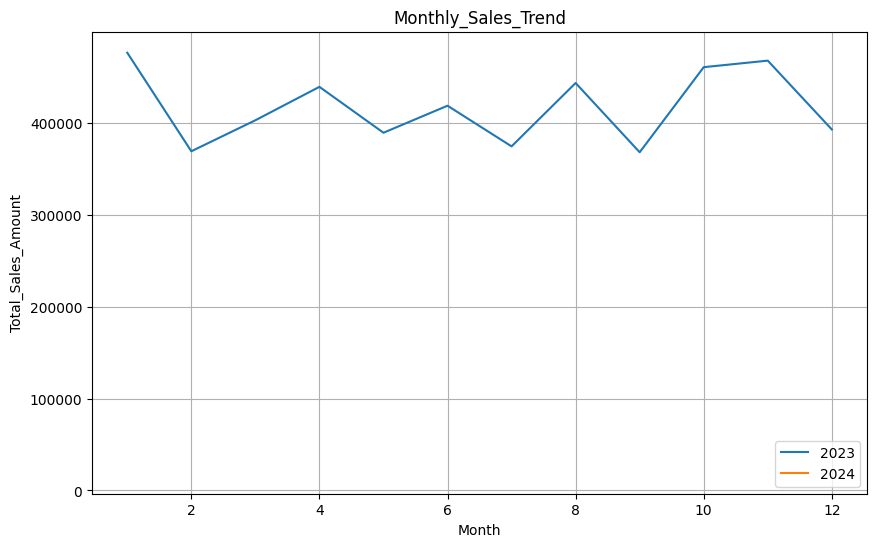

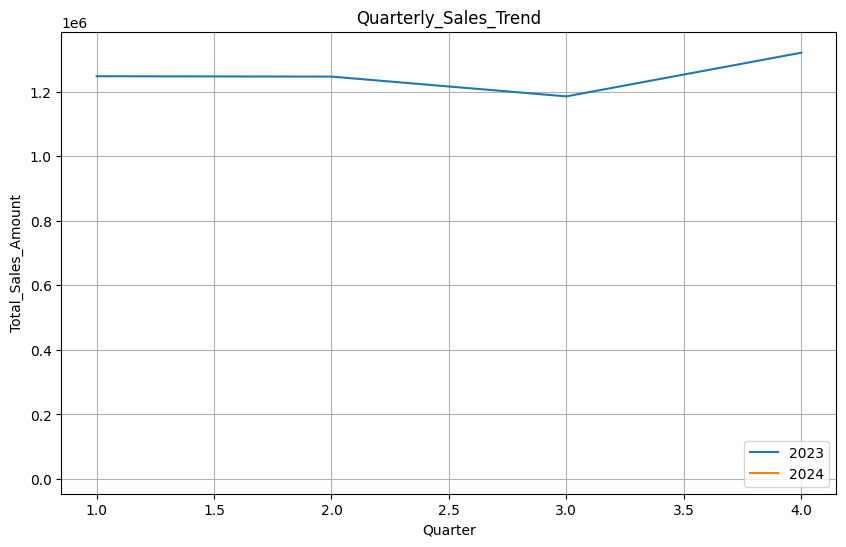

In [77]:
plt.figure(figsize=(10,6))
for year in monthly_sales['Year'].unique():
  plt.plot(monthly_sales[monthly_sales['Year']==year]['Month'],
           monthly_sales[monthly_sales['Year']==year]['Sales_Amount'],
           label=str(year))
plt.xlabel('Month')
plt.ylabel('Total_Sales_Amount')
plt.title('Monthly_Sales_Trend')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
for year in quaterly_sales['Year'].unique():
  plt.plot(quaterly_sales[quaterly_sales['Year']==year]['Quarter'],
           quaterly_sales[quaterly_sales['Year']==year]['Sales_Amount'],
           label=str(year))
plt.xlabel('Quarter')
plt.ylabel('Total_Sales_Amount')
plt.title('Quarterly_Sales_Trend')
plt.legend()
plt.grid(True)
plt.show()

In [78]:
region_sales=df.groupby('Region')['Sales_Amount'].sum()
print(region_sales)
highest_sales_region=region_sales.idxmax()
highest_sales_region

Region
East     1259792.93
North    1369612.51
South    1154250.86
West     1235608.93
Name: Sales_Amount, dtype: float64


'North'

               sum         mean    median          std
Region                                                
East    1259792.93  4790.087186  4649.880  2792.336854
North   1369612.51  5129.634869  5207.030  2893.659953
South   1154250.86  5107.304690  4759.875  2852.630702
West    1235608.93  5063.971025  5249.625  2851.413141


C:\Users\Farog Siddiqui\AppData\Local\Temp\ipykernel_5820\4214946812.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df, x='Region', palette='pastel')


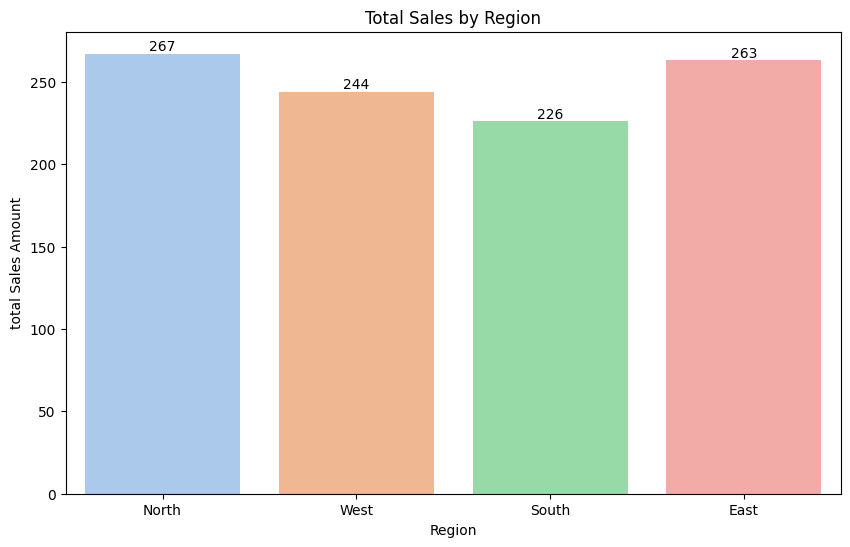

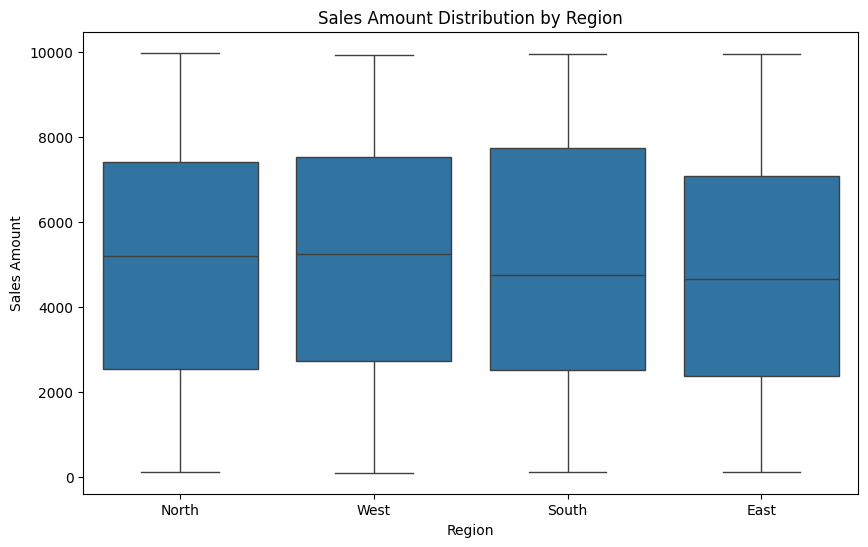

In [79]:
region_sales_stats=df.groupby('Region')['Sales_Amount'].agg(['sum','mean','median', 'std'])
print(region_sales_stats)

plt.figure(figsize=(10,6))
ax=sns.countplot(data=df, x='Region', palette='pastel')
for bars in ax.containers:
  ax.bar_label(bars)
plt.xlabel('Region')
plt.ylabel('total Sales Amount')
plt.title('Total Sales by Region')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='Region',y='Sales_Amount', data=df)
plt.xlabel('Region')
plt.ylabel('Sales Amount')
plt.title('Sales Amount Distribution by Region')
plt.show()

In [80]:
product_revenue=df.groupby('Product_Category')['Sales_Amount'].sum()
print(product_revenue)
highest_revenue_category=product_revenue.idxmax()
print(f'The product category with the highest revenue is: {highest_revenue_category}')

Product_Category
Clothing       1313474.36
Electronics    1243499.64
Food           1201773.54
Furniture      1260517.69
Name: Sales_Amount, dtype: float64
The product category with the highest revenue is: Clothing


Product_Category
Food           5317.582035
Electronics    5054.876585
Clothing       4901.023731
Furniture      4848.144962
Name: Sales_Amount, dtype: float64


C:\Users\Farog Siddiqui\AppData\Local\Temp\ipykernel_5820\875171147.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  dx=sns.barplot(data=df, x='Product_Category', y='Sales_Amount', palette='pastel')


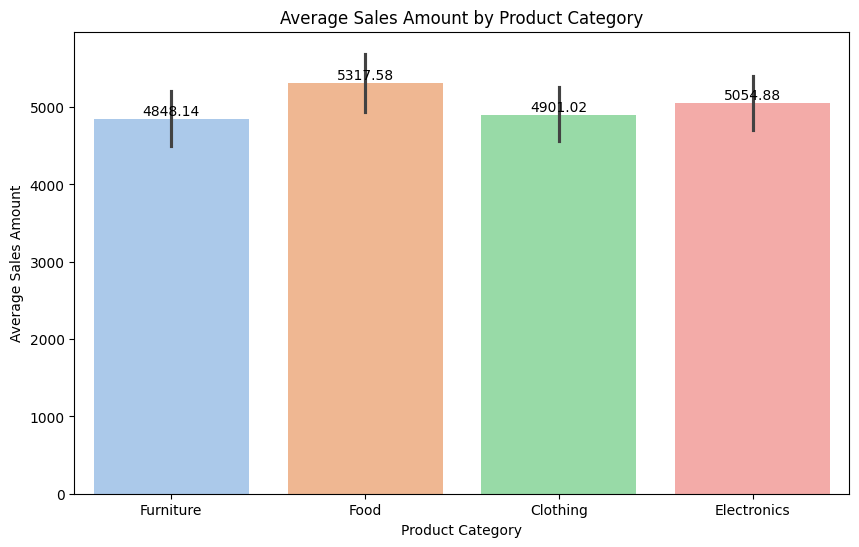

In [81]:
avg_sales_amount_by_cat=df.groupby('Product_Category')['Sales_Amount'].mean()
print(avg_sales_amount_by_cat.sort_values(ascending=False))

plt.figure(figsize=(10,6))
dx=sns.barplot(data=df, x='Product_Category', y='Sales_Amount', palette='pastel')
for bars in dx.containers:
  dx.bar_label(bars)
plt.xlabel('Product Category')
plt.ylabel('Average Sales Amount')
plt.title('Average Sales Amount by Product Category')
plt.show()

In [82]:
top_sales_reps = df.groupby('Sales_Rep')['Sales_Amount'].sum().sort_values(ascending=False)
top_sales_reps

Sales_Rep
David      1141737.36
Bob        1080990.63
Eve         970183.99
Alice       965541.77
Charlie     860811.48
Name: Sales_Amount, dtype: float64

   Region Sales_Rep  Sales_Amount
1    East       Bob     309876.11
3    East     David     284613.51
0    East     Alice     260789.47
4    East       Eve     239340.90
2    East   Charlie     165172.94
9   North       Eve     304172.20
7   North   Charlie     299789.01
8   North     David     282539.27
5   North     Alice     249647.22
6   North       Bob     233464.81
13  South     David     311416.99
11  South       Bob     251200.43
10  South     Alice     239414.54
14  South       Eve     196078.22
12  South   Charlie     156140.68
16   West       Bob     286449.28
18   West     David     263167.59
17   West   Charlie     239708.85
19   West       Eve     230592.67
15   West     Alice     215690.54


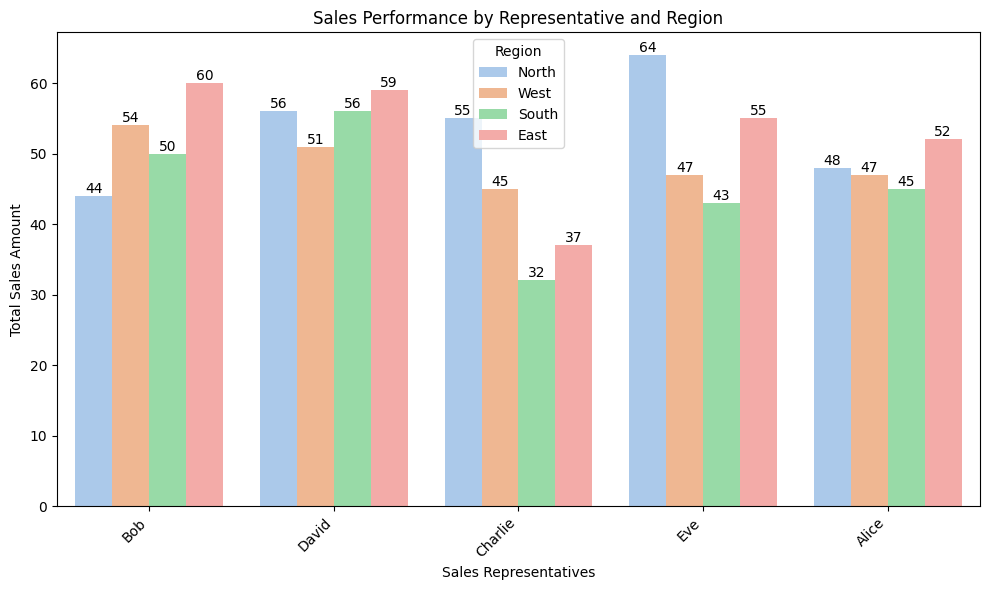

In [83]:
sales_by_rep_region=df.groupby(['Region','Sales_Rep'])['Sales_Amount'].sum().reset_index()
sales_by_rep_region_sorted=sales_by_rep_region.sort_values(by=['Region','Sales_Amount'], ascending=[True, False])

print(sales_by_rep_region_sorted)

plt.figure(figsize=(10,6))
ex=sns.countplot(data=df, x='Sales_Rep', hue='Region', palette='pastel')
for bars in ex.containers:
  ex.bar_label(bars)
plt.xlabel('Sales Representatives')
plt.ylabel('Total Sales Amount')
plt.title('Sales Performance by Representative and Region')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Customer_Type
New          2506258.30
Returning    2513006.93
Name: Sales_Amount, dtype: float64


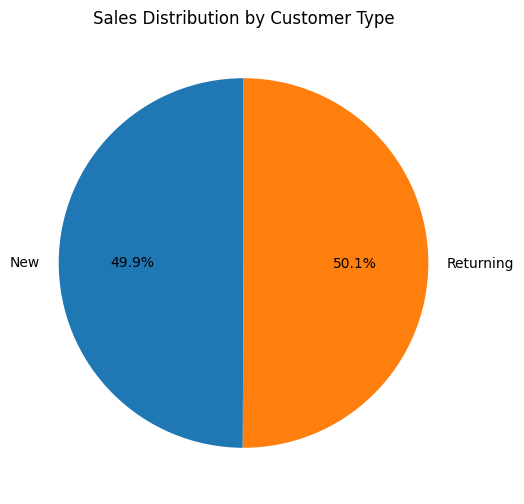

In [84]:
customer_sales=df.groupby('Customer_Type')['Sales_Amount'].sum()
print(customer_sales)

plt.figure(figsize=(10,6))
plt.pie(customer_sales, labels=customer_sales.index, autopct='%1.1f%%', startangle=90)
plt.title('Sales Distribution by Customer Type')
plt.show()

In [85]:
payment_method_counts = df['Payment_Method'].value_counts()
most_popular_payment = payment_method_counts.index[0]
print(f"The most popular payment method is: {most_popular_payment}")

The most popular payment method is: Credit Card


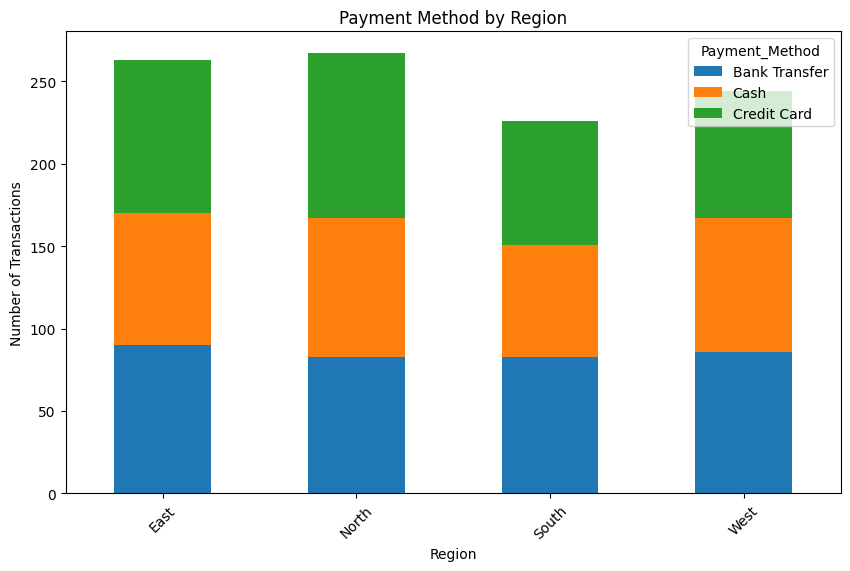

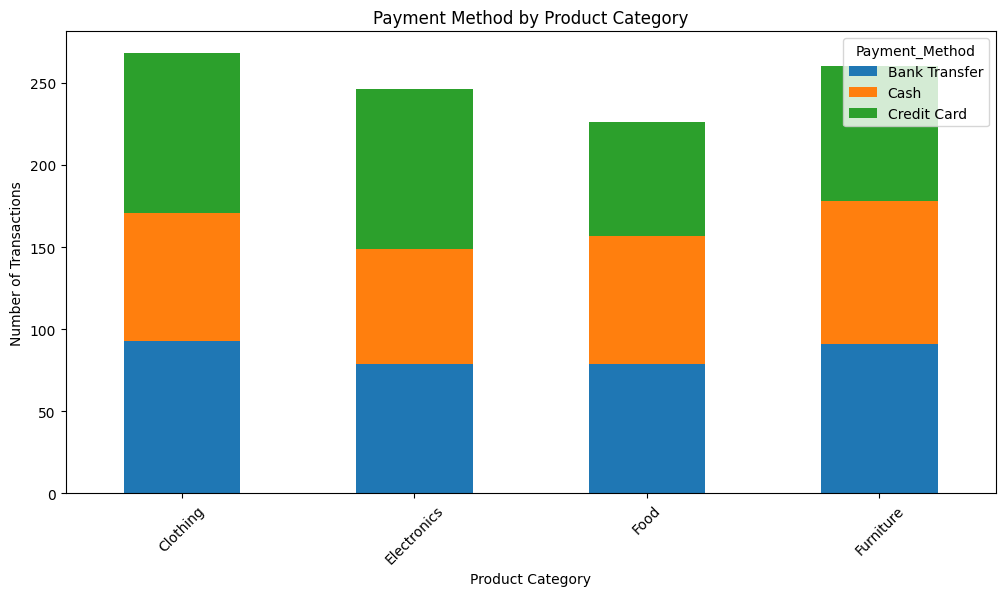

In [86]:
payment_by_region = df.groupby(['Region', 'Payment_Method'])['Sales_Amount'].count().unstack()
payment_by_region.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Payment Method by Region')
plt.xlabel('Region')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

# Payment method by product category
payment_by_product = df.groupby(['Product_Category', 'Payment_Method'])['Sales_Amount'].count().unstack()
payment_by_product.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Payment Method by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()